### Problem 1: Generating Some Data As A Toy Example



Generate three clusters of data as A, B, and C. 

* A = 10 (x,y) samples from the gaussian distribution, with mean=(0,0), cov=I, i.
e., N(mean,std)

* B = 10 (x,y) samples from the gaussian distribution, with mean=(4,4), cov=I, i.e., N(mean,std)

* C = 10 (x,y) samples from the gaussian distribution, with mean=(-4,4), cov=I, i.e., N(mean,std)

*Hint: use the multivariate_normal function, and set the mean, covariance, and size for each cluster.*

In [16]:
import numpy as np
# Add code here to generate the three clusters
A = np.random.multivariate_normal(mean=[0,0],cov=np.eye(2),size=10)
B = np.random.multivariate_normal(mean=[4,4],cov=np.eye(2),size=10)
C = np.random.multivariate_normal(mean=[-4,4],cov=np.eye(2),size=10)

data = np.concatenate([A,B,C])
data.shape

(30, 2)

Visualize the true distribution of the samples by plotting them in a scatter plot. Plot the x and y coordinates for each sample in A, B, and C. Try to use a for loop to do this. 

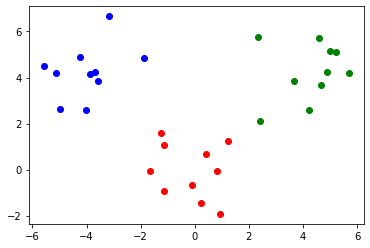

In [17]:
import matplotlib.pyplot as plt
color_list = ['r','g','b']

# Add your code here
start_idx = 0
end_idx = 10
for i in range(len(color_list)):
    plt.scatter(data[start_idx:end_idx,0], data[start_idx:end_idx,1], c=color_list[i])
    start_idx = start_idx + 10
    end_idx = end_idx + 10

### Problem 2: How can we cluster these points if we do not know the labels?

First, mix and shuffle the data, which includes A, B, and C. There's a function in the numpy library that will do this. 

Then, visualize the data through a scatter plot. 

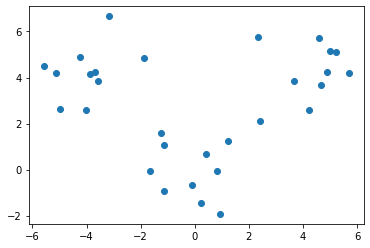

In [18]:
# Add your code here to mix and shuffle the data. Make sure data contains A, B, and C.
np.random.shuffle(data)
# Add your code to visualize the samples through a scatter plot
plt.scatter(data[:,0],data[:,1])

In [19]:
data

array([[-3.86776811,  4.16642229],
       [-3.70344634,  4.25100938],
       [ 2.3394258 ,  5.76306243],
       [ 5.22105204,  5.11803038],
       [-4.0239945 ,  2.59727371],
       [ 0.42455393,  0.68766924],
       [ 0.22094106, -1.43799923],
       [ 0.81393689, -0.07582609],
       [ 4.23176804,  2.57234583],
       [ 3.65492971,  3.86888843],
       [ 4.58891745,  5.72974037],
       [-5.56826578,  4.51146881],
       [-1.2456271 ,  1.60740745],
       [-4.26017403,  4.89111534],
       [ 1.22391169,  1.23321139],
       [-0.11668419, -0.65265546],
       [ 5.68579565,  4.20173006],
       [ 4.99687373,  5.16172846],
       [-1.14958088, -0.93401467],
       [ 4.89300657,  4.24457307],
       [ 0.92820575, -1.92442578],
       [-1.12550474,  1.04814942],
       [-1.87817768,  4.8325744 ],
       [-1.64513497, -0.0484062 ],
       [-5.13908726,  4.20624057],
       [ 2.41204417,  2.10785178],
       [-4.97185385,  2.61478414],
       [-3.18510988,  6.66141702],
       [ 4.68086903,

Now, implement the K-Means algorithm yourself. 


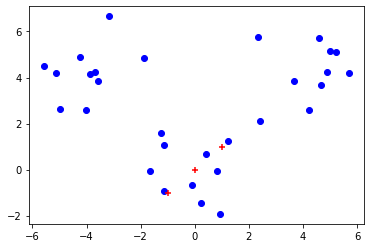

In [20]:
# How many clusters should you have? Set the value of K based on the number of clusters you created in Problem 1.
K = 3
# Select three random points as initial centers (pick any three coordinates)
centers = np.array([[0,0],[1,1],[-1,-1]]) 

# Now visualize the center and the samples. You can add a 'marker' parameter in the numpy scatterplot function to visualize where the center is. 
plt.scatter(data[:,0],data[:,1],c='blue')
plt.scatter(centers[:,0],centers[:,1],c='red', marker='+')

In [22]:
# Create a new empty array of zeros to store the distances in 
dist = np.zeros([len(data),K])

# Iterate through the clusters and fill the distance array 
# Calculate the distance between the sample to each class center. You can do this using the norm function.
for i in range(K):
  dist[:,i] = np.linalg.norm(data - centers[i], axis = 1)
# dist

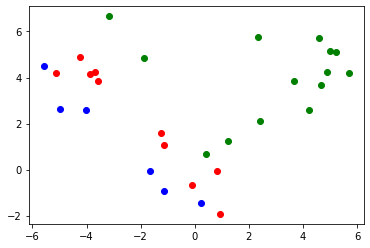

In [23]:
# Assign the class of each sample to the closest center. You can use the numpy function argmin, which returns the indices of the minimum values along an axis.
labels = np.argmin(dist, axis=1)

# Visualize the initial cluster results for the three clusters: 
for i in range(K):
  plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c=color_list[i])

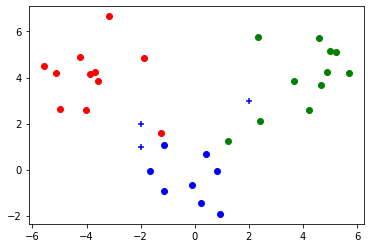

In [24]:
# Find new centers and assign new labels to the samples, then visualize again
for i in range(K):
  centers[i] = np.mean(data[labels==i],axis=0)

# Calculate the new distance the way you did before
dist = np.zeros([len(data),K])
for i in range(K):
  dist[:,i] = np.linalg.norm(data-centers[i],axis = 1)

# Assign new labels like you did before using argmin
labels = np.argmin(dist, axis=1)

# Visualize the data again 
for i in range(K):
  plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c=color_list[i])

# Plot the centers as a scatter plot
plt.scatter(centers[:,0],centers[:,1],c='b',marker='+')

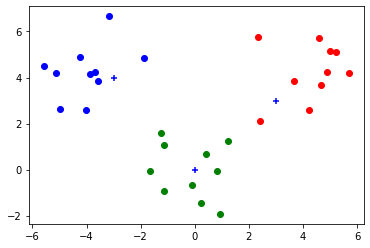

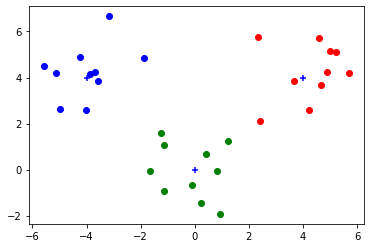

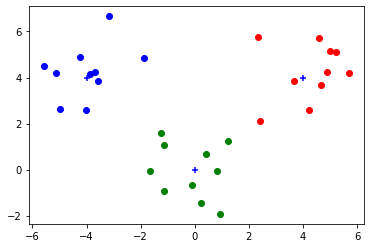

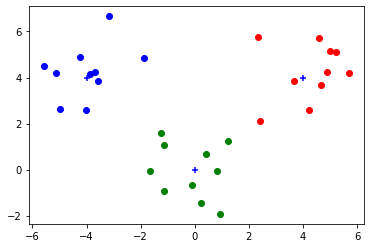

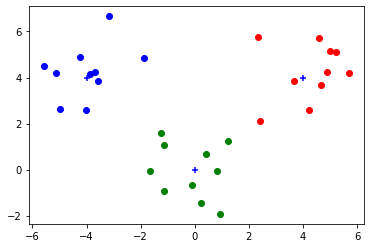

In [25]:
# Iterate finding new centers and assigning new labels 5 times. Hint: you have all the code for one time above. 
for iter in range(5):
  # Find new centers
  for i in range(K):
    centers[i] = np.mean(data[labels==i],axis=0)
  # Calculate the new distance
  dist = np.zeros([len(data),K])
  for i in range(K):
    dist[:,i] = np.linalg.norm(data-centers[i],axis = 1)
  # Assign new labels
  labels = np.argmin(dist, axis=1)
  # Visualize in 5 figures respectively to see the convergence
  plt.figure()
  for i in range(K):
    plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c = color_list[i-1])
  
  plt.scatter(centers[:,0],centers[:,1],c='b',marker='+')